In [1]:
from sklearn import svm
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn import datasets

In [2]:
%matplotlib inline
import matplotlib.pyplot as plt

In [ ]:
"""
Important parameters for SVC
    gamma -> defines how far the influence of a single training example reaches
             Low value: influence reaches far      
             High value: influence reaches close

        C -> trades off hyperplane surface simplicity + training examples mis-classifications
             Low value: simple/smooth hyperplane surface 
             High value: all training examples classified correctly but complex surface 
"""

In [4]:
dataset = datasets.load_iris()

features = dataset.data
targets = dataset.target

featureTrain, featureTest, targetTrain, targetTest = train_test_split(features, targets, test_size=0.3)

In [5]:
model = svm.SVC()
# model = svm.SVC(gamma=0.001, C=100)

In [6]:
model.fit(featureTrain, targetTrain)
predictions = model.predict(featureTest)

print(confusion_matrix(targetTest, predictions))
print(accuracy_score(targetTest, predictions))

[[11  0  0]
 [ 0 16  0]
 [ 0  1 17]]
0.977777777778


### Handwrited Digits

In [7]:
digits = datasets.load_digits()
print(digits.images.shape)

(1797, 8, 8)


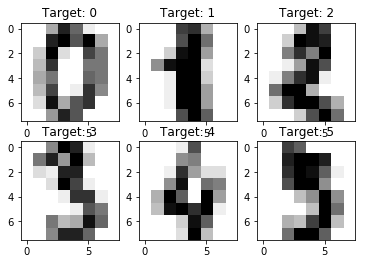

In [8]:
images_and_labels = list(zip(digits.images, digits.target))

for index, (image, label) in enumerate(images_and_labels[:6]):
   plt.subplot(2, 3, index + 1)
   plt.imshow(image, cmap=plt.cm.gray_r, interpolation='nearest')
   plt.title('Target: %i' % label)

In [9]:
# flatten the image
n_samples = len(digits.images)
data = digits.images.reshape((n_samples, -1))
print("Data :",data.shape)

Data : (1797, 64)


In [10]:
X_train, X_test, y_train, y_test = train_test_split(data, digits.target, test_size=0.2)

In [11]:
classifier = svm.SVC(gamma=0.001)
classifier.fit(X_train, y_train)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma=0.001, kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [12]:
predicted = classifier.predict(X_test)

In [13]:
print("Confusion matrix:\n%s" % confusion_matrix(y_test, predicted))
print("Accuracy:\n", accuracy_score(y_test, predicted))

Confusion matrix:
[[35  0  0  0  0  0  0  0  0  0]
 [ 0 35  0  0  0  0  0  0  0  0]
 [ 0  0 40  0  0  0  0  0  0  0]
 [ 0  0  0 44  0  0  0  0  0  0]
 [ 0  0  0  0 34  0  0  0  0  0]
 [ 0  0  0  0  0 34  0  0  0  0]
 [ 0  0  0  0  0  0 29  0  0  0]
 [ 0  0  0  0  0  0  0 41  0  1]
 [ 0  1  0  0  0  0  0  0 30  0]
 [ 0  0  0  0  0  0  0  0  0 36]]
Accuracy:
 0.994444444444


Prediction for test image:  [9]


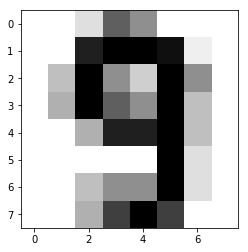

In [14]:
plt.imshow(digits.images[-2], cmap=plt.cm.gray_r, interpolation='nearest')
print("Prediction for test image: ", classifier.predict(data[-2].reshape(1,-1)))